# SVM回归

本脚本展示如何使用TensorFlow来求解支持向量回归问题。我们将会找到一条线，该线有一个最大边界（其尽可能多的包含数据点）。

我们使用iris数据集：

$y =$ Sepal Length

$x =$ Pedal Width

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

/home/zhangxin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
sess = tf.Session()

In [4]:
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# 分割数据集
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [5]:
batch_size = 50

# placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# variables
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [6]:
# model
model_output = tf.add(tf.matmul(x_data, A), b)

In [8]:
# Loss = max(0, abs(target - predicted) + epsilon)
# 1/2 margin width parameter = epsilon
epsilon = tf.constant([0.5])
# loss中的边界项
loss = tf.reduce_mean(tf.maximum(0., 
                                 tf.subtract(tf.abs(tf.subtract(model_output, y_target)), 
                                             epsilon)))

In [9]:
# optimizer
my_opt = tf.train.GradientDescentOptimizer(0.075)
train_step = my_opt.minimize(loss)

# 初始化variables
init = tf.global_variables_initializer()
sess.run(init)

In [10]:
# 训练loop
train_loss = []
test_loss = []
for i in range(200):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_train_loss = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
    train_loss.append(temp_train_loss)
    
    temp_test_loss = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
    test_loss.append(temp_test_loss)
    if (i+1)%50==0:
        print('-----------')
        print('Generation: ' + str(i+1))
        print('A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Train Loss = ' + str(temp_train_loss))
        print('Test Loss = ' + str(temp_test_loss))

-----------
Generation: 50
A = [[2.779849]] b = [[1.7630149]]
Train Loss = 0.9254286
Test Loss = 0.958034
-----------
Generation: 100
A = [[2.1454988]] b = [[2.796514]]
Train Loss = 0.5407222
Test Loss = 0.5775427
-----------
Generation: 150
A = [[1.6044482]] b = [[3.7295141]]
Train Loss = 0.22702798
Test Loss = 0.2580978
-----------
Generation: 200
A = [[1.2093482]] b = [[4.2890143]]
Train Loss = 0.10060247
Test Loss = 0.12908632


In [11]:
# 获取系数A和b
[[slope]] = sess.run(A)
[[y_intercept]] = sess.run(b)
[width] = sess.run(epsilon)

# 得到最优拟合曲线
best_fit = []
best_fit_upper = []
best_fit_lower = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)
  best_fit_upper.append(slope*i+y_intercept+width)
  best_fit_lower.append(slope*i+y_intercept-width)

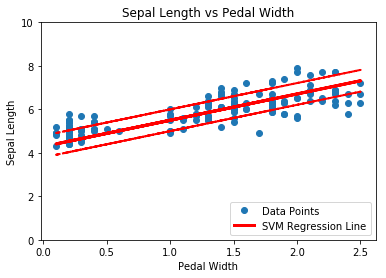

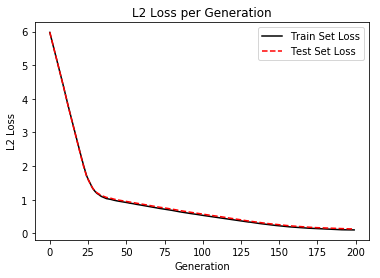

In [12]:
# Plot拟合曲线
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='SVM Regression Line', linewidth=3)
plt.plot(x_vals, best_fit_upper, 'r--', linewidth=2)
plt.plot(x_vals, best_fit_lower, 'r--', linewidth=2)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# 画出损失值随训练轮数的变化趋势
plt.plot(train_loss, 'k-', label='Train Set Loss')
plt.plot(test_loss, 'r--', label='Test Set Loss')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.legend(loc='upper right')
plt.show()